In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("college_event_feedback_1000_rows.csv")

# Preview data
df.head()

,Event_Name,Event_Type,Department,Rating,Feedback_Comment,Would_Recommend
0,AI Workshop,Workshop,Electronics,1,Too long and unengaging,No
1,Entrepreneurship Seminar,Seminar,Civil,2,Poor organisation,No
2,AI Workshop,Workshop,Computer Science,4,Very informative and well organised,Yes
3,AI Workshop,Workshop,Civil,2,Needs better planning,No
4,Tech Symposium,Seminar,Management,4,Well structured and engaging,Yes


In [25]:
# Dataset shape
df.shape

# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Event_Name        1000 non-null   object
 1   Event_Type        1000 non-null   object
 2   Department        1000 non-null   object
 3   Rating            1000 non-null   int64 
 4   Feedback_Comment  1000 non-null   object
 5   Would_Recommend   1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [8]:
# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()

np.int64(403)

In [26]:
# Basic text cleaning
df['Feedback_Comment'] = df['Feedback_Comment'].str.lower()
df['Feedback_Comment'] = df['Feedback_Comment'].str.replace('[^a-zA-Z ]', '', regex=True)

df[['Feedback_Comment']].head()

,Feedback_Comment
0,too long and unengaging
1,poor organisation
2,very informative and well organised
3,needs better planning
4,well structured and engaging


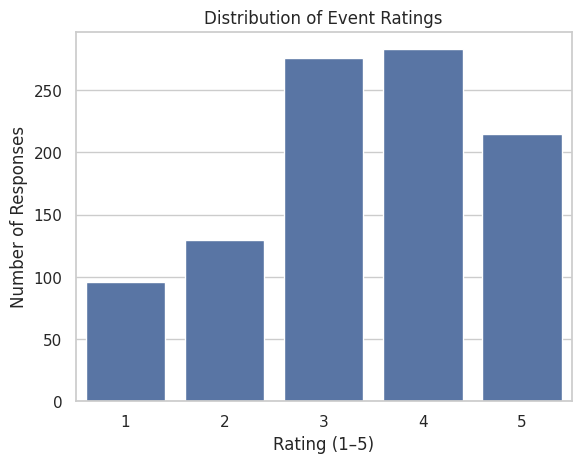

In [10]:
plt.figure()
sns.countplot(x='Rating', data=df)
plt.title("Distribution of Event Ratings")
plt.xlabel("Rating (1–5)")
plt.ylabel("Number of Responses")
plt.show()

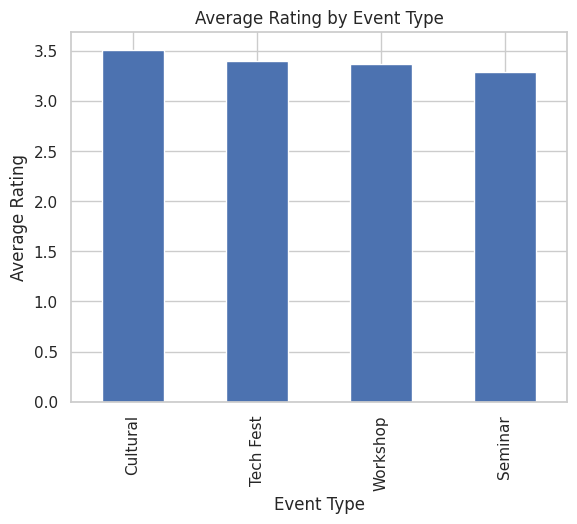

In [11]:
event_type_rating = df.groupby('Event_Type')['Rating'].mean().sort_values(ascending=False)

event_type_rating

plt.figure()
event_type_rating.plot(kind='bar')
plt.title("Average Rating by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Average Rating")
plt.show()

In [12]:
!pip install textblob

In [13]:
from textblob import TextBlob

In [14]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment_Score'] = df['Feedback_Comment'].apply(get_sentiment)
df[['Feedback_Comment', 'Sentiment_Score']].head()

,Feedback_Comment,Sentiment_Score
0,too long and unengaging,-0.125
1,poor organisation,-0.400
2,very informative and well organised,0.200
3,needs better planning,0.500
4,well structured and engaging,0.400


In [15]:
def sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment_Label'] = df['Sentiment_Score'].apply(sentiment_label)

df['Sentiment_Label'].value_counts()

,count
Sentiment_Label,
Positive,772
Negative,178
Neutral,50


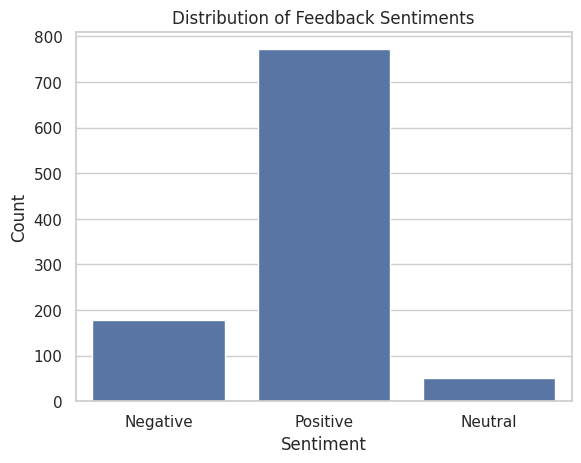

In [16]:
plt.figure()
sns.countplot(x='Sentiment_Label', data=df)
plt.title("Distribution of Feedback Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

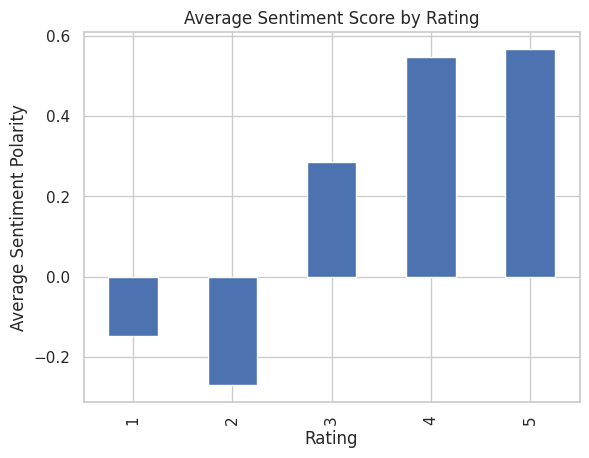

In [17]:
sentiment_by_rating = df.groupby('Rating')['Sentiment_Score'].mean()

sentiment_by_rating

plt.figure()
sentiment_by_rating.plot(kind='bar')
plt.title("Average Sentiment Score by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Sentiment Polarity")
plt.show()

In [18]:
event_sentiment = df.groupby('Event_Type')['Sentiment_Score'].mean().sort_values(ascending=False)

event_sentiment

,Sentiment_Score
Event_Type,
Cultural,0.338247
Seminar,0.303255
Tech Fest,0.301034
Workshop,0.290116


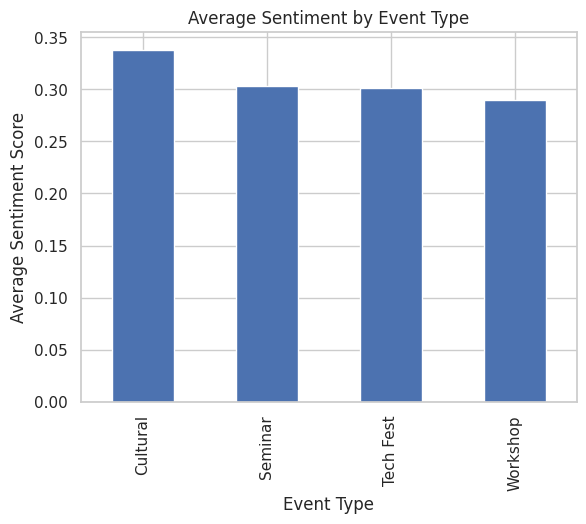

In [19]:
plt.figure()
event_sentiment.plot(kind='bar')
plt.title("Average Sentiment by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Average Sentiment Score")
plt.show()

In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud

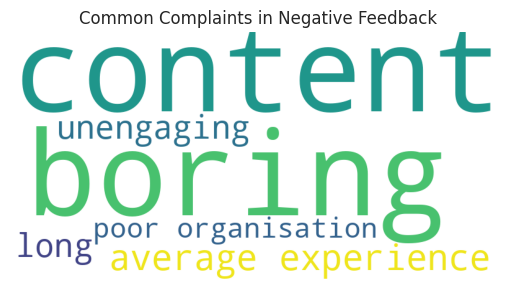

In [22]:
negative_text = " ".join(
    df[df['Sentiment_Label'] == 'Negative']['Feedback_Comment']
)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(negative_text)

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Common Complaints in Negative Feedback")
plt.show()